<a href="https://colab.research.google.com/github/krishkhandlwl/Game-tutorial/blob/main/Paris_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from pylab import rcParams 
rcParams['figure.figsize'] = (12,8)
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler , StandardScaler 

In [ ]:
prices =pd.read_csv('ParisHousing.csv')
prices.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [ ]:
prices.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [ ]:
prices.isnull()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


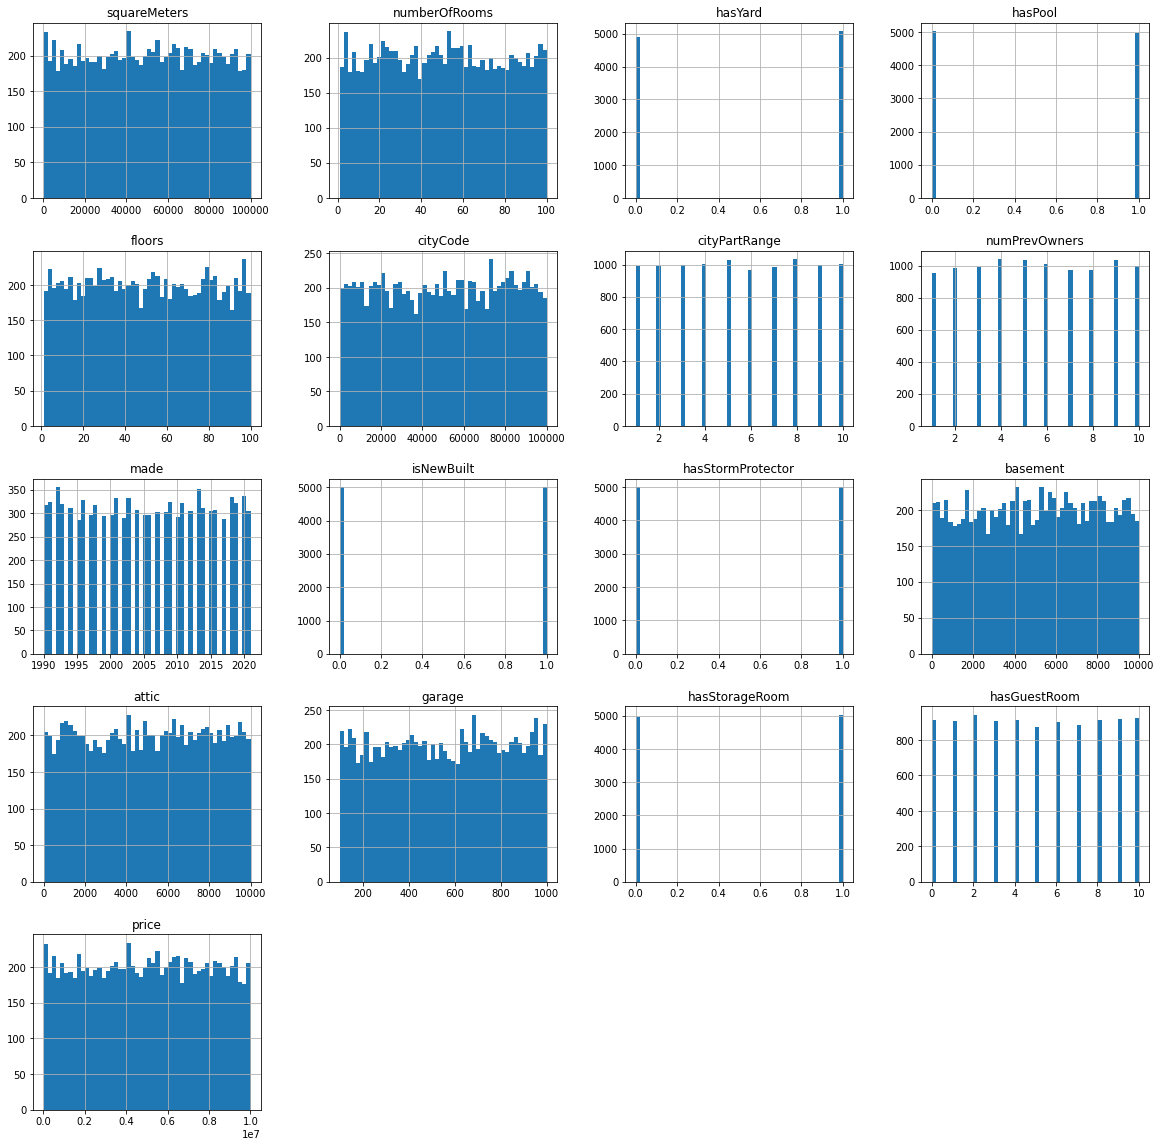

In [ ]:
prices.hist(bins = 50, figsize = (20,20))
plt.show()

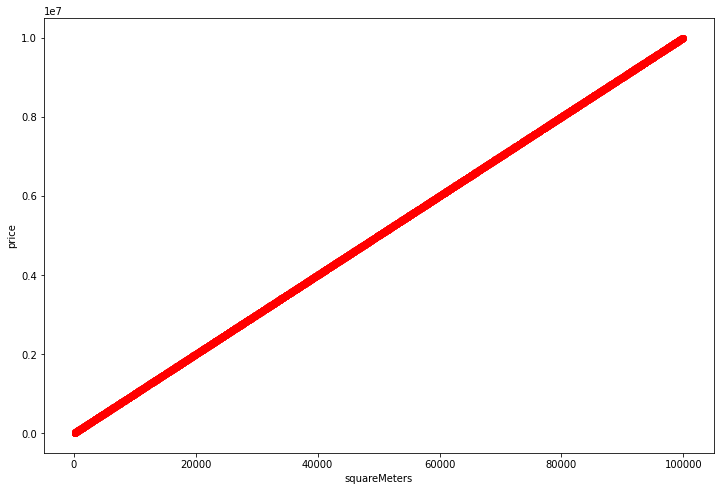

In [ ]:
plt.scatter( prices['squareMeters'], prices['price'], alpha=0.5 , color = 'red')
plt.xlabel('squareMeters') 
plt.ylabel('price') 
plt.show()

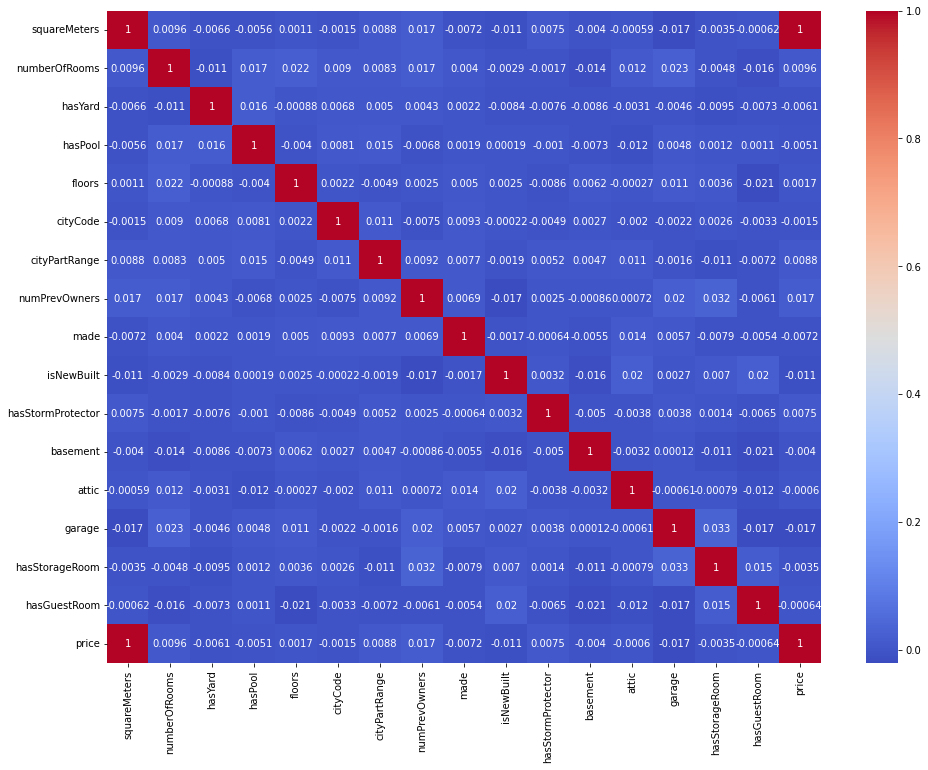

In [ ]:
import seaborn as sns
corr = prices.corr()
plt.figure(figsize = (16, 12))
sns.heatmap(corr, annot = True , cmap = 'coolwarm')
plt.show()

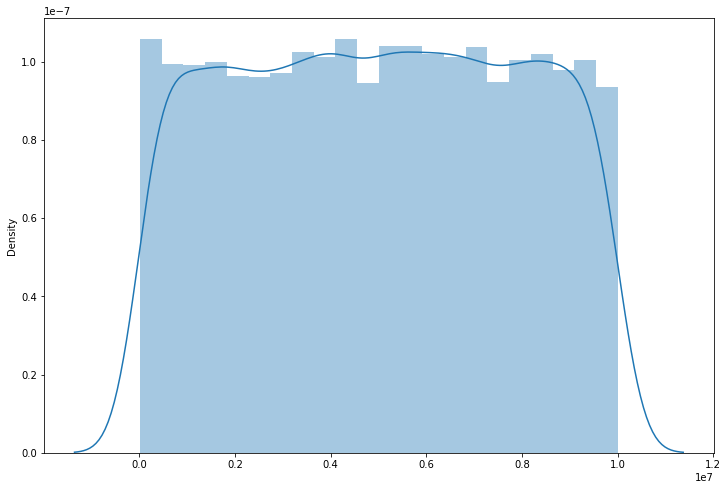

In [ ]:
sns.distplot(x=prices['price'])

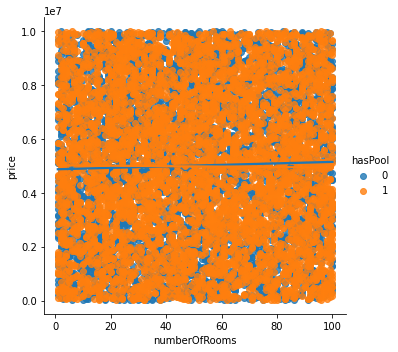

In [ ]:
ax = sns.lmplot(x = 'numberOfRooms' , y = 'price' , data = prices , hue = 'hasPool')

In [ ]:
prices.drop_duplicates()


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [ ]:
data_dummies = pd.get_dummies(prices)
data_dummies.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [ ]:
x = prices.drop(['price'] , axis = 1 )
x

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4


In [ ]:
y = prices['price']
pd.DataFrame(y)

,price
0,7559081.5
1,8085989.5
2,5574642.1
3,3232561.2
4,7055052.0
...,...
9995,176425.9
9996,4448474.0
9997,8390030.5
9998,5905107.0


In [ ]:
x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.2, random_state = 4)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Regressor = LinearRegression()
Regressor

LinearRegression()

In [ ]:
Regressor.fit(x_train , y_train ) 

LinearRegression()

In [ ]:
 y_pred1 = Regressor.predict(x_test)

In [ ]:
from sklearn import metrics


print (f'MSE: {metrics.mean_squared_error(y_test , y_pred1)}')

print (f'MAE: {metrics.mean_absolute_error(y_test , y_pred1)}')

print (f'r2_score: {metrics.r2_score(y_test , y_pred1)}')

print (f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test , y_pred1))}')

MSE: 3598269.126848425
MAE: 1485.152532242022
r2_score: 0.999999559102069
RMSE: 1896.9104161368361


In [ ]:
test_res= y_test - y_pred1

In [ ]:
test_res

1603    -507.454168
8713    2124.211057
4561    2140.918337
6600    1075.992569
2558   -2252.338141
           ...     
1944    1339.661871
5978     693.647220
9809    1780.959389
4014    1364.985528
5652     909.603915
Name: price, Length: 2000, dtype: float64

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1, 'diff':(abs(y_test-y_pred1))})

,Actual,Predicted,diff
1603,4224392.3,4.224900e+06,507.454168
8713,6573646.1,6.571522e+06,2124.211057
4561,8390712.5,8.388572e+06,2140.918337
6600,5014491.8,5.013416e+06,1075.992569
2558,1189428.9,1.191681e+06,2252.338141
...,...,...,...
1944,9937148.6,9.935809e+06,1339.661871
5978,456380.0,4.556864e+05,693.647220
9809,7918754.7,7.916974e+06,1780.959389
4014,182644.9,1.812799e+05,1364.985528


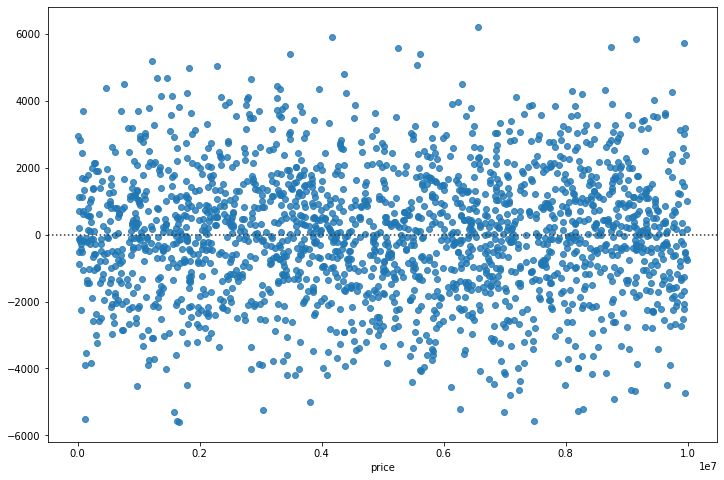

In [ ]:
sns.residplot(y_test, y_pred1)  
plt.show()